### 1. Import libraries

In [2]:
# install.packages("bestNormalize",repos = "http://cran.us.r-project.org")

library(ggplot2) #visualization
library(grid)
library(gridExtra)
library(bestNormalize)
library(ggthemes) # visualization themes

Warning message:
"package 'gridExtra' was built under R version 3.4.4"Warning message:
"package 'bestNormalize' was built under R version 3.4.4"Warning message:
"package 'ggthemes' was built under R version 3.4.4"

### 2. Import dataset

In [3]:
ad3 <- read.csv("AD3.csv", stringsAsFactors = FALSE)
head(ad3)

conversion,conversionAjustada2punto2Kg,mortalidadPor,noDePollosMuertos,pesoFinalPolloG,gananciaPesoDiaG,AD3Engrode,AD3Inicio,AD3Preinicio,consumoAjustadoA2punto2Kg,consumoDiaPolloG,consumoTotalPolloG,duracionEngordeDias,ea,edadAjustadaA2punto2Kg,edadEnDias,feep,ip,n,noPollitos
1.80,1.82,0.02,2843,2141.63,52.75,0,0,0,4001.00,95.00,3857.17,40.6,118.91,41.33,41,292.88,66.02,2,127660
1.73,1.70,0.03,1597,2339.01,53.77,0,0,0,3729.18,93.07,4048.43,43.5,135.14,41.77,44,310.66,78.08,13,61472
1.77,1.77,0.02,2357,2212.36,53.70,0,0,0,3885.39,95.02,3914.98,41.2,125.02,41.05,41,303.45,70.65,11,101719
1.72,1.72,0.09,15794,2192.94,53.49,0,0,0,3783.72,91.88,3767.27,41.0,127.65,41.09,41,311.35,74.31,29,180847
1.70,1.68,0.04,3155,2276.53,55.53,0,0,0,3685.28,94.12,3858.96,41.0,134.30,40.09,41,327.56,79.23,38,84493
1.75,1.71,0.04,8553,2385.27,55.99,0,0,0,3748.76,98.04,4176.50,42.6,136.23,40.37,43,319.78,77.80,17,220491


In [5]:
i <- 3
colnames(ad3[i])
head(sort(table(ad3[i],useNA = "always"),decreasing = TRUE),10)

[1] "mortalidadPor"


0.04 0.03 0.05 0.06 0.07 0.02 0.08 0.09  0.1 0.11 
 707  684  572  414  294  224  174  133   93   75 

In [6]:
#number of observations per aditive
sum(ad3$AD3Engrode)
sum(ad3$AD3Inicio)
sum(ad3$AD3Preinicio)

[1] 80

[1] 1904

[1] 34

### 3. Prueba estadistica del Peso final en relacion de aplicacion de aditivos

El primer paso para realizar esta prueba es asegurarse de que la muestra de pesos siga una distribicion normal.

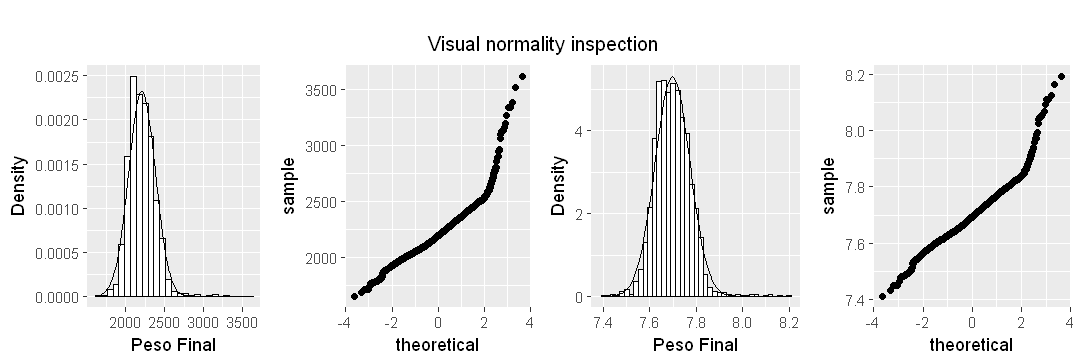

In [7]:
#Distribucion original del peso. Ligeramente inclinada hacia la izquierda
v1 <- ad3[ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),"pesoFinalPolloG"]
p1 <-ggplot(data.frame(x=v1), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = 75) + 
    labs(x = "Peso Final", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v1, na.rm = TRUE), sd = sd(v1, na.rm = TRUE)), size = 0.4)

#QQ plot de la distribucion original
p2 <-qplot(sample = v1)

#Distribucion corregida por logaritmo
v2 <- log(v1)
p3 <-ggplot(data.frame(x=v2), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = .02) + 
    labs(x = "Peso Final", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v2, na.rm = TRUE), sd = sd(v2, na.rm = TRUE)), size = 0.4)

# QQplot de la distribucion corregida
p4 <-qplot(sample = v2)

options(repr.plot.width=9, repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 4, top=textGrob("\n Visual normality inspection"))

[1] "base mean: 2114.916  sd: 118.21  log(base) mean: 7.655  sd: 0.055"

[1] "engorde mean: 2014.05  sd: 180.045  log(engorde) mean: 7.604  sd: 0.086"

[1] "Engorde t-value: -0.93"

[1] "inicio mean: 2298.449  sd: 159.649  log(inicio) mean: 7.738  sd: 0.066"

[1] "Inicio t-value: 1.5"

[1] "Preinicio mean: 2897.794  sd: 361.848  log(preinicio) mean: 7.964  sd: 0.127"

[1] "Preinicio t-value: 5.62"

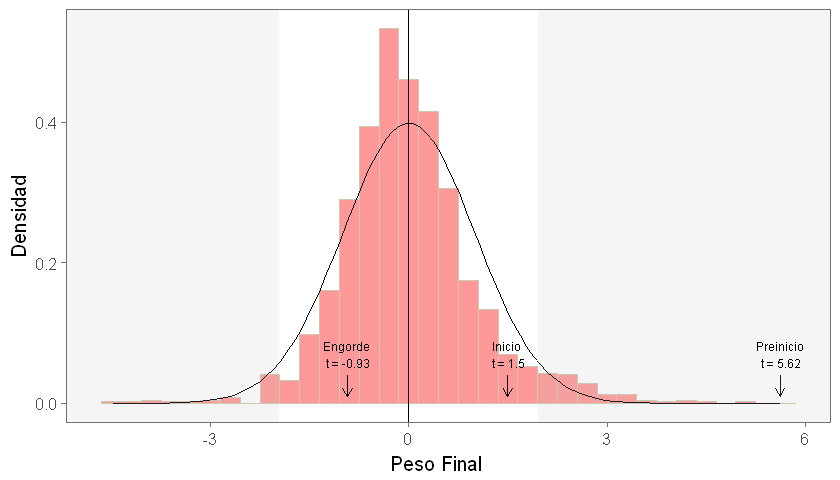

In [11]:
#Peso Final

# Vector incluyendo solo las muestras sin ningun aditivo
base <- ad3[ad3$AD3Engrode==0 & ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0 & ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),c("pesoFinalPolloG")] 
paste("base mean:",round(mean(base),3), " sd:",round(sd(base),3)," log(base) mean:",round(mean(log(base)),3), " sd:",round(sd(log(base)),3))

# Vector con las muestras en base logarimica y estandarizadas
base.sd <- (log(base) - mean(log(base)))/sd(log(base))

# Calculo de la media, y t-value de las muestras en el que AD3engorde fue aplicado
engorde <- ad3[ad3$AD3Engrode==1 & ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),c("pesoFinalPolloG")] 
paste("engorde mean:",round(mean(engorde),3), " sd:",round(sd(engorde),3)," log(engorde) mean:",round(mean(log(engorde)),3), " sd:",round(sd(log(engorde)),3))
engorde.t <- round((mean(log(engorde)) -mean(log(base)))/sd(log(base)),2)
paste("Engorde t-value:",engorde.t)

# Calculo de la media, y t-value de las muestras en el que AD3inicio fue aplicado
inicio <- ad3[ad3$AD3Inicio==1 & ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),c("pesoFinalPolloG")] 
paste("inicio mean:",round(mean(inicio),3), " sd:",round(sd(inicio),3)," log(inicio) mean:",round(mean(log(inicio)),3), " sd:",round(sd(log(inicio)),3))
inicio.t <- round((mean(log(inicio)) -mean(log(base)))/sd(log(base)),2)
paste("Inicio t-value:",inicio.t)

# Calculo de la media, y t-value de las muestras en el que AD3Preinicio fue aplicado
preinicio <- ad3[ad3$AD3Preinicio==1 & ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),c("pesoFinalPolloG")] 
paste("Preinicio mean:",round(mean(preinicio),3), " sd:",round(sd(preinicio),3)," log(preinicio) mean:",round(mean(log(preinicio)),3), " sd:",round(sd(log(preinicio)),3))
preinicio.t <- round((mean(log(preinicio)) -mean(log(base)))/sd(log(base)),2)
paste("Preinicio t-value:",preinicio.t)

options(repr.plot.width=7, repr.plot.height=4) #Graph sizing in jupyter,for rstudio is not required

e <- data.frame(x=c(engorde.t,inicio.t,preinicio.t), y=c(.04,.04,.04), vx=c(0,0,0), vy=c(-.03,-.03,-.03))

ggplot(data.frame(x=base.sd), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "cornsilk3", fill = "red", alpha=.4, binwidth = 0.3) + 
    theme_few() + #minimalistic theme
    labs(x = "PesoFinal", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(base.sd, na.rm = TRUE), sd = sd(base.sd, na.rm = TRUE)), size = 0.4) +
    geom_segment(data=e, mapping=aes(x=x, y=y, xend=x+vx, yend=y+vy), arrow=arrow(length=unit(0.20,"cm"))) +
    annotate("rect", xmin = -Inf, xmax = -qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    annotate("rect", xmin = Inf, xmax = qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    geom_vline(xintercept = 0) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=preinicio.t, y2=0.07, text2=paste("Preinicio\n t =",preinicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=inicio.t, y2=0.07, text2=paste("Inicio\n t =",inicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=engorde.t, y2=0.07, text2=paste("Engorde\n t =",engorde.t)), size=2.5)  +  
    xlab("Peso Final    ") +
    ylab("Densidad")




In [15]:
exp(1.96 * sd(log(base)) + mean(log(base)))
exp(-1.96 * sd(log(base)) + mean(log(base)))      
      

[1] 2351.584

[1] 1896.284

#### Explicación:
La hipótesis nula, la cual es establecida en este estudio, asume que no hay ninguna diferencia entre el peso promedio de la muestra base (muestras a las que no se les aplico ningun suplemento) y las muestras a las cuales se les aplicaron los suplementos. Si este fuera el caso, no existiría ninguna diferencia estadísticamente significativa entre la muestra base y las muestras a las que se les aplicaron suplementos. La zona marcada en blanco en el grafico se le conoce como intervalo de confianza al 95% de la muestra base. Si promedio de las muestras en las que se aplicó suplemento se encontraran fuera del intervalo de confianza, podremos rechazar la hipótesis nula y asegurar de que existe enrealidad un efecto, positivo o negativo de los suplementos aplicados.

El peso promedio sin la aplicación de ningún suplemento es de aproximadamente 2115 gramos con una desviación estándar de 118 gramos.

En el caso del suplemento AD3Engorde, el promedio de las muestras a las que se les aplico este suplemento es de 2014g lo cual es menor a la muestra base. Este resultado no es significativo (t= -0.93) ya que el promedio se encuentra dentro del intervalo de confianza (marcado en blanco) de la muestra base que se extiende de -1.96 < t < 1.96.

Las muestras a las que se les aplico el suplemento AD3Inicio tienen un peso promedio superior al promedio de la muestra base (2298g), Sin embargo, este resultado tampoco es significativo en el intervalo del 95% de confianza por lo que no se puede hacer ninguna conclusión en términos estadísticos.

Las muestras a las que se les aplico el suplemento AD3Preinicio tienen un peso promedio superior a la muestra base (2898g). Este resultado es estadísticamente significativo ya que cae dentro de la zona de rechazo (t > 1.96) con un valor t de 5.62. Esto quiere decir que hay evidencia estadística (>99%) de que las muestras a las que se les aplico el suplemento AD3Preinicio poseen en promedio un peso final mayor que a la muestra base. Es importante señalar que solo hay 34 muestras a las que se les aplico este suplemento por lo que sería ideal hacer un análisis más a detalle otras variables de la muestras a las que se les aplico este suplemento.

### 4. Prueba estadistica de la Mortalidad en relacion de aplicacion de aditivos

El primer paso para realizar esta prueba es asegurarse de que la muestra de pesos siga una distribicion normal.

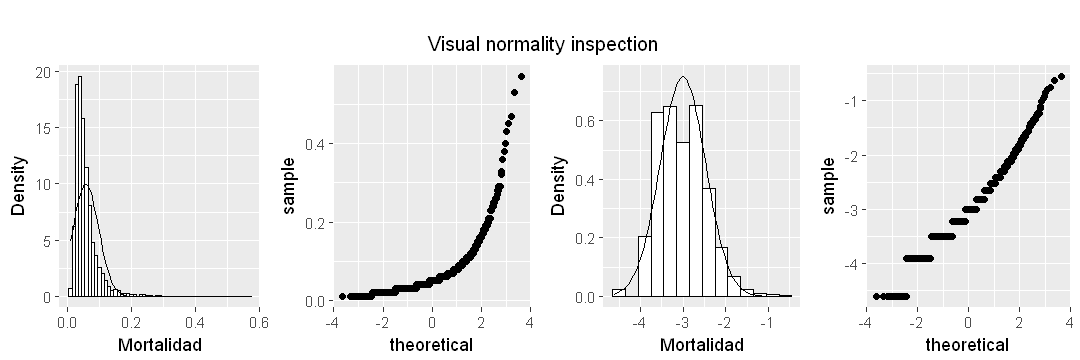

In [503]:
#Distribucion original del peso. Ampliamente inclinada hacia la izquierda
v1 <- ad3[ad3$mortalidadPor>0 & !is.na(ad3$mortalidadPor),"mortalidadPor"]
p1 <-ggplot(data.frame(x=v1), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = .01) + 
    labs(x = "Mortalidad", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v1, na.rm = TRUE), sd = sd(v1, na.rm = TRUE)), size = 0.4)

#QQ plot de la distribucion original
p2 <-qplot(sample = v1)

#Distribucion corregida por logaritmo
v2 <- log(v1)
p3 <-ggplot(data.frame(x=v2), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = .3) + 
    labs(x = "Mortalidad", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v2, na.rm = TRUE), sd = sd(v2, na.rm = TRUE)), size = 0.4)

# QQplot de la distribucion corregida
p4 <-qplot(sample = v2)

options(repr.plot.width=9, repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 4, top=textGrob("\n Visual normality inspection"))


[1] "base mean: 0.056  sd: 0.034  log(base) mean: -3.017  sd: 0.503"

[1] "engorde mean: 0.113  sd: 0.128  log(engorde) mean: -2.645  sd: 0.915"

[1] "Engorde t-value: 0.7"

[1] "inicio mean: 0.057  sd: 0.035  log(inicio) mean: -3.009  sd: 0.529"

[1] "Inicio t-value: 0"

[1] "Preinicio mean: 0.047  sd: 0.014  log(preinicio) mean: -3.101  sd: 0.31"

[1] "Preinicio t-value: -0.2"

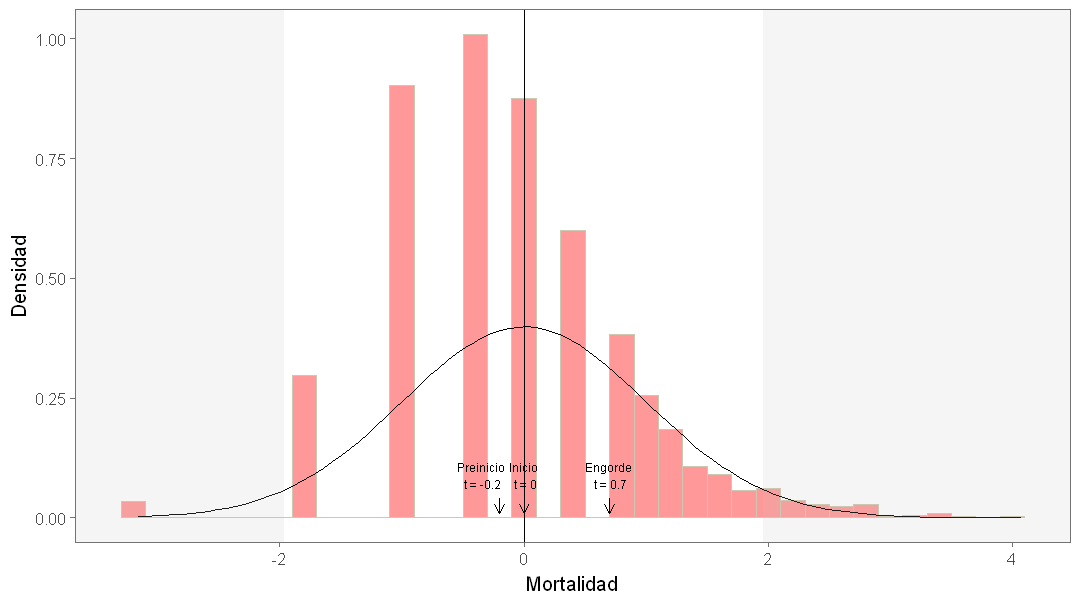

In [16]:
# Vector incluyendo solo las muestras sin ningun aditivo
base <- ad3[ad3$AD3Engrode==0 & ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0 & ad3$mortalidadPor>0 & !is.na(ad3$mortalidadPor),c("mortalidadPor")] 
paste("base mean:",round(mean(base),3), " sd:",round(sd(base),3)," log(base) mean:",round(mean(log(base)),3), " sd:",round(sd(log(base)),3))

# Vector con las muestras en base logarimica y estandarizadas
base.sd <- (log(base) - mean(log(base)))/sd(log(base))

# Calculo de la media, y t-value de las muestras en el que AD3engorde fue aplicado
engorde <- ad3[ad3$AD3Engrode==1 & ad3$mortalidadPor>0 & !is.na(ad3$mortalidadPor),c("mortalidadPor")] 
paste("engorde mean:",round(mean(engorde),3), " sd:",round(sd(engorde),3)," log(engorde) mean:",round(mean(log(engorde)),3), " sd:",round(sd(log(engorde)),3))
engorde.t <- round((mean(log(engorde)) -mean(log(base)))/sd(log(base)),1)
paste("Engorde t-value:",engorde.t)

# Calculo de la media, y t-value de las muestras en el que AD3inicio fue aplicado
inicio <- ad3[ad3$AD3Inicio==1 & ad3$mortalidadPor>0 & !is.na(ad3$mortalidadPor),c("mortalidadPor")] 
paste("inicio mean:",round(mean(inicio),3), " sd:",round(sd(inicio),3)," log(inicio) mean:",round(mean(log(inicio)),3), " sd:",round(sd(log(inicio)),3))
inicio.t <- round((mean(log(inicio)) -mean(log(base)))/sd(log(base)),1)
paste("Inicio t-value:",inicio.t)

# Calculo de la media, y t-value de las muestras en el que AD3Preinicio fue aplicado
preinicio <- ad3[ad3$AD3Preinicio==1 & ad3$mortalidadPor>0 & !is.na(ad3$mortalidadPor),c("mortalidadPor")] 
paste("Preinicio mean:",round(mean(preinicio),3), " sd:",round(sd(preinicio),3)," log(preinicio) mean:",round(mean(log(preinicio)),3), " sd:",round(sd(log(preinicio)),3))
preinicio.t <- round((mean(log(preinicio)) -mean(log(base)))/sd(log(base)),1)
paste("Preinicio t-value:",preinicio.t)

options(repr.plot.width=9, repr.plot.height=5) #Graph sizing in jupyter,for rstudio is not required

e <- data.frame(x=c(engorde.t,inicio.t,preinicio.t), y=c(.04,.04,.04), vx=c(0,0,0), vy=c(-.03,-.03,-.03))

ggplot(data.frame(x=base.sd), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "cornsilk3", fill = "red", alpha=.4, binwidth = 0.2) + 
    theme_few() + #minimalistic theme
    labs(x = "PesoFinal", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(base.sd, na.rm = TRUE), sd = sd(base.sd, na.rm = TRUE)), size = 0.4) +
    geom_segment(data=e, mapping=aes(x=x, y=y, xend=x+vx, yend=y+vy), arrow=arrow(length=unit(0.20,"cm"))) +
    annotate("rect", xmin = -Inf, xmax = -qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    annotate("rect", xmin = Inf, xmax = qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    geom_vline(xintercept = 0) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=preinicio.t-0.15, y2=0.09, text2=paste("Preinicio\n t =",preinicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=inicio.t, y2=0.09, text2=paste("Inicio\n t =",inicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=engorde.t , y2=0.09, text2=paste("Engorde\n t =",engorde.t)), size=2.5)  +  
    xlab("Mortalidad") +
    ylab("Densidad")



#### Explicación:
La hipótesis nula, la cual es establecida en este estudio, asume que no hay ninguna diferencia entre la tasa de mortalidad de la muestra base (muestras a las que no se les aplico ningún suplemento) y las muestras a las cuales se les aplicaron los suplementos. Si este fuera el caso, no existiría ninguna diferencia estadísticamente significativa entre la muestra base y las muestras a las que se les aplicaron suplementos. La zona marcada en blanco en el grafico se le conoce como intervalo de confianza al 95% de la muestra base. Si promedio de las muestras en las que se aplicó suplemento se encontraran fuera del intervalo de confianza, podremos rechazar la hipótesis nula y asegurar de que existe en realidad un efecto, positivo o negativo de los suplementos aplicados.

La tasa de mortalidad promedio de la muestra base es de aproximadamente 5.6% con una desviación estándar del 3.5%.

La conclusión general en relación a la tasa de mortalidad es que ninguno de los suplementos tiene ningún efecto significativo en este aspecto. El suplemento AD3Engorde es el que presenta el mayor efecto contraproducente (t-value = 0.7) sin embargo este valor se encuentra dentro del intervalo de confianza al 95% y muy por debajo de limite t-value = 1.96.


In [17]:
exp(1.96 * sd(log(base)) + mean(log(base)))
exp(-1.96 * sd(log(base)) + mean(log(base)))      
      

[1] 0.1311422

[1] 0.01826845

### 5. Prueba estadistica de la Conversion Ajustada en relacion de aplicacion de aditivos

El primer paso para realizar esta prueba es asegurarse de que la muestra de pesos siga una distribicion normal.

Warning message in orderNorm(x = c(1.82, 1.7, 1.77, 1.72, 1.68, 1.71, 1.69, 1.77, :
"Ties in data, Normal distribution not guaranteed
"

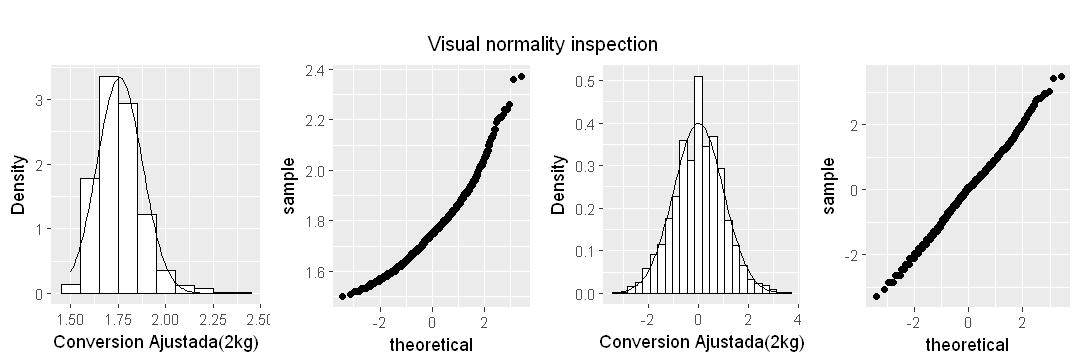

In [422]:
#Distribucion original del peso. Ligeramente inclinada hacia la izquierda
v1 <- ad3[ad3$AD3Engrode==0 & ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0 & ad3$conversionAjustada2punto2Kg>0 & !is.na(ad3$conversionAjustada2punto2Kg),"conversionAjustada2punto2Kg"]
p1 <-ggplot(data.frame(x=v1), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = .1) + 
    labs(x = "Conversion Ajustada(2kg)", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v1, na.rm = TRUE), sd = sd(v1, na.rm = TRUE)), size = 0.4)

#QQ plot de la distribucion original
p2 <-qplot(sample = v1)


#Distribucion corregida con PowerTransformation
v2<- bestNormalize(v1)$x.t

p3 <-ggplot(data.frame(x=v2), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = 0.3) + 
    labs(x = "Conversion Ajustada(2kg)", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v2, na.rm = TRUE), sd = sd(v2, na.rm = TRUE)), size = 0.4)

# QQplot de la distribucion corregida
p4 <-qplot(sample = v2)

options(repr.plot.width=9, repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 4, top=textGrob("\n Visual normality inspection"))

Warning message in orderNorm(x = c(1.82, 1.7, 1.77, 1.72, 1.68, 1.71, 1.69, 1.77, :
"Ties in data, Normal distribution not guaranteed
"

[1] "base mean: 1.758  sd: 0.119  base.normalized mean: 0  sd: 1"

[1] "engorde mean: 1.995  sd: 0.387"

[1] "standarized engorde mean: 1.884"

[1] "Engorde t-value: 1.88"

[1] "inicio mean: 1.68  sd: 0.083  standarized inicio mean: -0.639  sd: NA"

[1] "inicio t-value: -0.64"

[1] "preinicio mean: 1.518  sd: 0.069  standarized preinicio mean: -2.353  sd: NA"

[1] "preinicio t-value: -2.35"

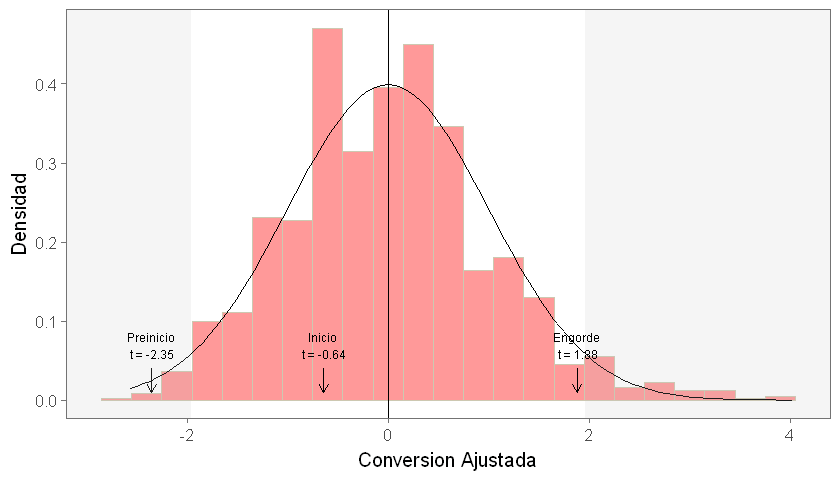

In [44]:
#Conversion Ajustada

# Vector incluyendo solo las muestras sin ningun aditivo
base <- ad3[ad3$AD3Engrode==0 & ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0 & ad3$conversionAjustada2punto2Kg>0 & !is.na(ad3$conversionAjustada2punto2Kg),c("conversionAjustada2punto2Kg")] 

# Conversion a distribucion normal usando PowerTransformation
base.nor<- bestNormalize(base)
base.sd <- base.nor$x.t

paste("base mean:",round(mean(base),3), " sd:",round(sd(base),3)," base.normalized mean:",round(mean(base.sd),3), " sd:",round(sd((base.sd),3)))

# Calculo de la media, y t-value de las muestras en el que AD3engorde fue aplicado
engorde <- ad3[ad3$AD3Engrode==1 & ad3$conversionAjustada2punto2Kg>0 & !is.na(ad3$conversionAjustada2punto2Kg),c("conversionAjustada2punto2Kg")] 
paste("engorde mean:",round(mean(engorde),3), " sd:",round(sd(engorde),3))
engorde.predict <- predict(base.nor, newdata = mean(engorde))
paste("standarized engorde mean:",round(engorde.predict,3))
engorde.t <- round((engorde.predict -mean(base.nor$x.t))/sd(base.nor$x.t),2)
paste("Engorde t-value:",engorde.t)

# Calculo de la media, y t-value de las muestras en el que AD3inicio fue aplicado
inicio <- ad3[ad3$AD3Inicio==1 & ad3$conversionAjustada2punto2Kg>0 & !is.na(ad3$conversionAjustada2punto2Kg),c("conversionAjustada2punto2Kg")] 
inicio.predict <- predict(base.nor, newdata = mean(inicio))
paste("inicio mean:",round(mean(inicio,na.rm = TRUE),3), " sd:",round(sd(inicio,na.rm = TRUE),3), " standarized inicio mean:",round(mean(inicio.predict,na.rm = TRUE),3), " sd:",round(sd(inicio.predict,na.rm = TRUE),3))
inicio.t <- round((mean(inicio.predict,na.rm = TRUE) -mean(base.sd))/sd(base.sd),2)
paste("inicio t-value:",inicio.t)

# Calculo de la media, y t-value de las muestras en el que AD3Preinicio fue aplicado
preinicio <- ad3[ad3$AD3Preinicio==1 & ad3$conversionAjustada2punto2Kg>0 & !is.na(ad3$conversionAjustada2punto2Kg),c("conversionAjustada2punto2Kg")] 
preinicio.predict <- predict(base.nor, newdata = mean(preinicio))
paste("preinicio mean:",round(mean(preinicio),3), " sd:",round(sd(preinicio),3), " standarized preinicio mean:",round(mean(preinicio.predict,na.rm = TRUE),3), " sd:",round(sd(preinicio.predict,na.rm = TRUE),3))
preinicio.t <- round((mean(preinicio.predict,na.rm = TRUE) -mean(base.sd,na.rm = TRUE))/sd(base.sd,na.rm = TRUE),2)
paste("preinicio t-value:",preinicio.t)


options(repr.plot.width=7, repr.plot.height=4) #Graph sizing in jupyter,for rstudio is not required

e <- data.frame(x=c(engorde.t,inicio.t,preinicio.t), y=c(.04,.04,.04), vx=c(0,0,0), vy=c(-.03,-.03,-.03))

ggplot(data.frame(x=base.sd), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "cornsilk3", fill = "red", alpha=.4, binwidth = 0.3) + 
    theme_few() + #minimalistic theme
    labs(x = "PesoFinal", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(base.sd, na.rm = TRUE), sd = sd(base.sd, na.rm = TRUE)), size = 0.3) +
    geom_segment(data=e, mapping=aes(x=x, y=y, xend=x+vx, yend=y+vy), arrow=arrow(length=unit(0.20,"cm"))) +
    annotate("rect", xmin = -Inf, xmax = -qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    annotate("rect", xmin = Inf, xmax = qnorm(1-0.05/2) ,ymin = -Inf, ymax = Inf,  fill = "gray", alpha=.15) +
    geom_vline(xintercept = 0) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=preinicio.t, y2=0.07, text2=paste("Preinicio\n t =",preinicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=inicio.t, y2=0.07, text2=paste("Inicio\n t =",inicio.t)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=engorde.t, y2=0.07, text2=paste("Engorde\n t =",engorde.t)), size=2.5)  +  
    xlab("Conversion Ajustada") +
    ylab("Densidad")



In [40]:
predict(base.nor, newdata = 1.552)
predict(base.nor, newdata = 1.995)
mean(engorde)

[1] -2.254556

[1] 1.755628

[1] 1.99475

In [39]:
engorde.t <- round((mean(engorde.predict) -mean(base.nor$x.t))/sd(base.nor$x.t),2)
   mean(engorde.predict)
mean(base.nor$x.t)
sd(base.nor$x.t)

[1] 1.349425

[1] -5.701493e-17

[1] 1

#### Explicación:
La hipótesis nula, la cual es establecida en este estudio, asume que no hay ninguna diferencia entre la tasa de conversion de la muestra base (muestras a las que no se les aplico ningun suplemento) y las muestras a las cuales se les aplicaron los suplementos. Si este fuera el caso, no existiría ninguna diferencia estadísticamente significativa entre la muestra base y las muestras a las que se les aplicaron suplementos. La zona marcada en blanco en el grafico se le conoce como intervalo de confianza al 95% de la muestra base. Si promedio de las muestras en las que se aplicó suplemento se encontraran fuera del intervalo de confianza, podremos rechazar la hipótesis nula y asegurar de que existe enrealidad un efecto, positivo o negativo de los suplementos aplicados.

La tasa de conversion ajustada promedio promedio sin la aplicación de ningún suplemento es aproximadamente 1.75 con una desviación estándar de 0.11.

En el caso del suplemento AD3Engorde, el promedio de las muestras a las que se les aplico este suplemento es de 1.99 lo cual es mayor a la muestra base. Este resultado no es significativo (t= 1.35) ya que el promedio se encuentra dentro del intervalo de confianza (marcado en blanco) de la muestra base que se extiende de -1.96 < t < 1.96.

Las muestras a las que se les aplico el suplemento AD3Inicio tienen una tasa de conversion menor al promedio de la muestra base 1.68. Sin embargo, este resultado tampoco es significativo ya que se encuentra dentro del intervalo del 95% (t=-0.69) por lo que no se puede hacer ninguna conclusión en términos estadísticos.

Las muestras a las que se les aplico el suplemento AD3Preinicio tienen una tasa de conversion significativamente inferior a la muestra base, siendo esta 1.518. Este resultado es estadísticamente significativo ya que cae dentro de la zona de rechazo (t < 1.96) con un valor t de -2.99. Esto quiere decir que hay evidencia estadística (>99%) de que las muestras a las que se les aplico el suplemento AD3Preinicio poseen en promedio una tasa de conversion menor que a la muestra base. Es importante señalar que solo hay 34 muestras a las que se les aplico este suplemento por lo que sería ideal hacer un análisis más a detalle otras variables de la muestras a las que se les aplico este suplemento.

### 6. Analisis de regresion de consumo por dia vs peso final
Como último paso procederemos a realizar un análisis de regresión para analizar el efecto de los diferentes suplementos en relación con el consumo por día y al peso final.

In [82]:
# Grafico de todas las muestras diferenciando entre las differentes categorias
ad3$Suplemento <- ifelse(ad3$AD3Engrode==0 & ad3$AD3Inicio==0 & ad3$AD3Preinicio==0, "Base","Inicio")
ad3[ad3$AD3Preinicio==1,"Suplemento"] <- "Preinicio"
ad3[ad3$AD3Engrode==1,"Suplemento"] <- "Engorde"

p1 <- ggplot() +
  geom_point(data = ad3, aes(x = consumoDiaPolloG, y = pesoFinalPolloG, color=Suplemento), size = 0.6)+
  xlim(50,150)+ ylim(1500,3600) + theme(legend.position = c(.15, .77))+  
    xlab("Consumo por dia (g)") +
    ylab("Peso Final (g)") + 
    guides(colour = guide_legend(override.aes = list(size=2)))

In [83]:
#Engorde
engorde <- ad3[ad3$AD3Engrode==1 | ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0,c("pesoFinalPolloG","consumoDiaPolloG","AD3Engrode")] 
engorde$Suplemento <- ifelse(engorde$AD3Engrode==0,"Base","Engorde")
reg.engorde <- lm(pesoFinalPolloG~AD3Engrode + consumoDiaPolloG + I(consumoDiaPolloG*AD3Engrode),engorde)
summary(reg.engorde)$coefficients


dat <- data.frame(x=60:150)

dat$linear <- reg.engorde$coefficients[1] + reg.engorde$coefficients[3]*dat$x
dat$engorde <- reg.engorde$coefficients[1] + reg.engorde$coefficients[2] + reg.engorde$coefficients[3]*dat$x + reg.engorde$coefficients[4]*dat$x 

p2 <- ggplot() +
  geom_point(data = engorde, aes(x = consumoDiaPolloG, y = pesoFinalPolloG, color= Suplemento), size = 0.6)+
  scale_color_manual(values=c("blue", "red")) +
  geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3)+
  geom_line(data = dat, aes(x = x, y = engorde), color="red", size = 0.3)+
  xlim(50,150)+ ylim(1500,3600) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Peso Final (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2))) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=140, y2=2600, text2=paste("Base \n m=",round(reg.engorde$coefficients[3]),2)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=140, y2=2100, text2=paste("Engorde \nm=",round(reg.engorde$coefficients[3] + reg.engorde$coefficients[4],2), " t-value:",round(summary(reg.engorde)$coefficients[4,3],2))), size=2.5) 


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1510.003894,41.7334585,36.182093,4.921494e-212
AD3Engrode,683.850792,112.8634938,6.059096,1.688940e-09
consumoDiaPolloG,6.861097,0.4683895,14.648272,8.553733e-46
I(consumoDiaPolloG * AD3Engrode),-8.516926,1.0670354,-7.981859,2.659867e-15


In [84]:
#Inicio
inicio <- ad3[ad3$AD3Inicio ==1 & ad3$AD3Preinicio == 0 | ad3$AD3Engrode==0 & ad3$AD3Preinicio == 0,c("pesoFinalPolloG","consumoDiaPolloG","AD3Inicio")] 
inicio$Suplemento <- ifelse(inicio$AD3Inicio==0,"Base","Inicio")
reg.inicio <- lm(pesoFinalPolloG~AD3Inicio + consumoDiaPolloG + I(consumoDiaPolloG*AD3Inicio),inicio)
summary(reg.inicio)$coefficients

dat <- data.frame(x=60:150)

dat$linear <- reg.inicio$coefficients[1] + reg.inicio$coefficients[3]*dat$x
dat$inicio <- reg.inicio$coefficients[1] + reg.inicio$coefficients[2] + reg.inicio$coefficients[3]*dat$x + reg.inicio$coefficients[4]*dat$x 

p3 <- ggplot() +
  geom_point(data = inicio, aes(x = consumoDiaPolloG, y = pesoFinalPolloG, color= Suplemento), size = 0.6)+
  scale_color_manual(values=c("blue", "red")) +
  geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3)+
  geom_line(data = dat, aes(x = x, y = inicio), color="red", size = 0.3)+
  xlim(50,150)+ ylim(1500,3600) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Peso Final (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2))) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=140, y2=2600, text2=paste("Base \n m=",round(reg.inicio$coefficients[3]),2)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=130, y2=3500, text2=paste("Inicio \nm=",round(reg.inicio$coefficients[3] + reg.inicio$coefficients[4],2), " t-value:",round(summary(reg.inicio)$coefficients[4,3],2))), size=2.5) 




,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1510.003894,36.7062240,41.13754,1.881957e-301
AD3Inicio,-1089.249337,58.4709073,-18.62891,6.937613e-74
consumoDiaPolloG,6.861097,0.4119671,16.65448,5.755484e-60
I(consumoDiaPolloG * AD3Inicio),13.150386,0.6380876,20.60906,4.210629e-89


In [85]:
#Prenicio
preinicio <- ad3[ad3$AD3Preinicio ==1 | ad3$AD3Engrode==0 & ad3$AD3Inicio == 0,c("pesoFinalPolloG","consumoDiaPolloG","AD3Preinicio")] 
preinicio$Suplemento <- ifelse(preinicio$AD3Preinicio==0,"Base","Preinicio")
reg.preinicio <- lm(pesoFinalPolloG~AD3Preinicio + consumoDiaPolloG + I(consumoDiaPolloG*AD3Preinicio),preinicio)
summary(reg.preinicio)$coefficients

dat <- data.frame(x=60:150)

dat$linear <- reg.preinicio$coefficients[1] + reg.preinicio$coefficients[3]*dat$x
dat$preinicio <- reg.preinicio$coefficients[1] + reg.preinicio$coefficients[2] + reg.preinicio$coefficients[3]*dat$x + reg.preinicio$coefficients[4]*dat$x 

p4 <- ggplot() +
  geom_point(data = preinicio, aes(x = consumoDiaPolloG, y = pesoFinalPolloG, color= Suplemento), size = 0.6)+
  scale_color_manual(values=c("blue","red")) +
  geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3)+
  geom_line(data = dat, aes(x = x, y = preinicio), color="red", size = 0.3)+
  xlim(50,150) + ylim(1500,3600) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Peso Final (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2)))+
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=140, y2=2600, text2=paste("Base \n m=",round(reg.preinicio$coefficients[3]),2)), size=2.5) +
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=130, y2=3500, text2=paste("Preinicio \nm=",round(reg.preinicio$coefficients[3] + reg.preinicio$coefficients[4],2), " t-value:",round(summary(reg.preinicio)$coefficients[4,3],2))), size=2.5) 



,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1510.003894,40.2044978,37.558084,1.351234e-222
AD3Preinicio,-1694.463259,175.7617080,-9.640685,1.998822e-21
consumoDiaPolloG,6.861097,0.4512294,15.205339,6.553898e-49
I(consumoDiaPolloG * AD3Preinicio),19.197213,1.5071309,12.737588,1.730669e-35


Warning message:
"Removed 57 rows containing missing values (geom_point)."Warning message:
"Removed 56 rows containing missing values (geom_point)."Warning message:
"Removed 55 rows containing missing values (geom_point)."Warning message:
"Removed 56 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing missing values (geom_path)."

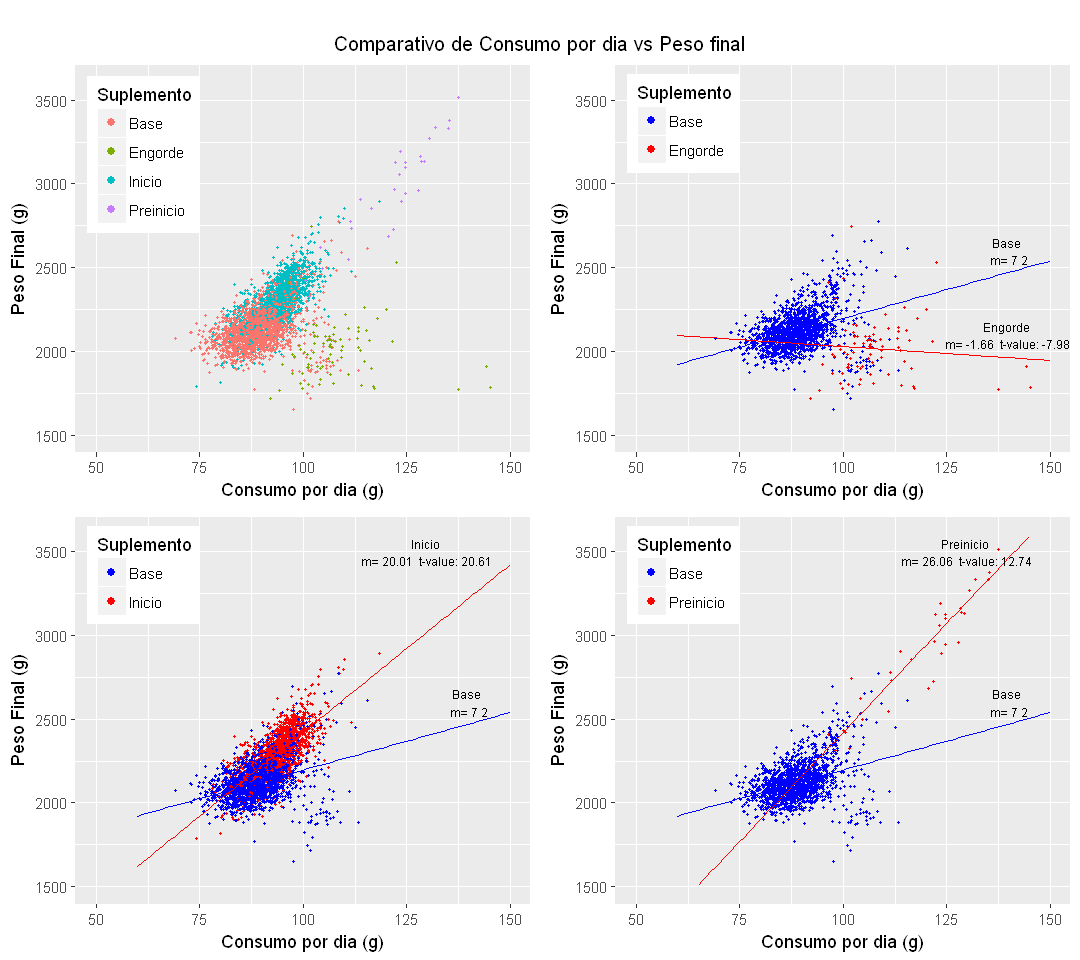

In [86]:
options(repr.plot.width=9,repr.plot.height=8) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 2, top=textGrob("\n Comparativo de Consumo por dia vs Peso final "))

El analisis de regresion permite reconocer las tendencias generales de los diferentes grupos de control y al mismo tiemppo determinar que tan estadisticamente significativas son estas diferencias. El parametro m mide la pendiente de la curva de regresion de los differentes grupoes de control. Adicionalmente es posible calcular que tan estadisticamente significativo es 

### 6. Analisis de regresion de conversion
Como último paso procederemos a realizar un análisis de regresión para analizar el efecto de los diferentes suplementos en relación con el consumo por día y al peso final.

In [285]:
x1<-60; x2<-135;y1<- 1.25; y2<-2.6

#Engorde
suplemento <- ad3[ad3$AD3Engrode==1 | ad3$AD3Inicio==0 & ad3$AD3Preinicio == 0,c("consumoDiaPolloG","gananciaPesoDiaG","AD3Engrode")] 
colnames(suplemento) <- c("invar","depvar","sup")
suplemento$Suplemento <- ifelse(suplemento$sup==0,"Base","Engorde")
reg <- lm(depvar~sup + invar + I(invar*sup),suplemento)
summary(reg)$coefficients

dat <- data.frame(x=(x1+5):(x2-10))

dat$linear <- reg$coefficients[1] + reg$coefficients[3]*dat$x
dat$engorde <- reg$coefficients[1] + reg$coefficients[2] + reg$coefficients[3]*dat$x + reg$coefficients[4]*dat$x 

suplemento$conversion <- ifelse(suplemento$sup ==1, suplemento$invar/suplemento$depvar,NA)
suplemento$conversion.base <- ifelse(suplemento$sup ==0, suplemento$invar/suplemento$depvar,NA)

p1 <- ggplot(suplemento, aes(x = invar)) +
    geom_smooth(aes(y = conversion*30),method = "loess", span = 2,color="red",size = 0.6,fill=NA) +
    geom_smooth(aes(y = conversion.base*30),method = "loess", span = 2,color="blue",size = 0.6,fill=NA) +
    geom_point(aes(y = depvar, color= Suplemento), size = 0.6)+
#   geom_point(aes(y = conversion*30), color = "yellow",size = 2)+
    scale_y_continuous(sec.axis = sec_axis(~./30, name = "Conversion"),limits = c(y1*30, y2*30)) +
    scale_color_manual(values=c("blue", "red")) +
    geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3, linetype = "longdash")+
    geom_line(data = dat, aes(x = x, y = engorde), color="red", size = 0.3, linetype = "longdash")+
    xlim(x1,x2) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Ganancia de peso por dia (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2))) 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.7496541,1.02352671,27.11180,2.068550e-134
sup,29.1068063,2.76826307,10.51447,4.428045e-25
invar,0.2660245,0.01148767,23.15741,4.306025e-103
I(invar * sup),-0.2681146,0.02617171,-10.24445,6.308233e-24


In [277]:
#Inicio
suplemento <- ad3[ad3$AD3Inicio ==1 & ad3$AD3Preinicio == 0 | ad3$AD3Engrode==0 & ad3$AD3Preinicio == 0,c("consumoDiaPolloG","gananciaPesoDiaG","AD3Inicio")] 
colnames(suplemento) <- c("invar","depvar","sup")
suplemento$Suplemento <- ifelse(suplemento$sup==0,"Base","Inicio")
reg <- lm(depvar~sup + invar + I(invar*sup),suplemento)
summary(reg)$coefficients

dat <- data.frame(x=(x1+5):(x2-10))

dat$linear <- reg$coefficients[1] + reg$coefficients[3]*dat$x
dat$engorde <- reg$coefficients[1] + reg$coefficients[2] + reg$coefficients[3]*dat$x + reg$coefficients[4]*dat$x 

suplemento$conversion <- ifelse(suplemento$sup ==1, suplemento$invar/suplemento$depvar,NA)
suplemento$conversion.base <- ifelse(suplemento$sup ==0, suplemento$invar/suplemento$depvar,NA)

p2 <- ggplot(suplemento, aes(x = invar)) +
    geom_smooth(aes(y = conversion*30),method = "loess", span = 2,color="red",size = 0.6,fill=NA) +
    geom_smooth(aes(y = conversion.base*30),method = "loess", span = 2,color="blue",size = 0.6,fill=NA) +
    geom_point(aes(y = depvar, color= Suplemento), size = 0.6)+
#   geom_point(aes(y = conversion*30), color = "yellow",size = 2)+
    scale_y_continuous(sec.axis = sec_axis(~./30, name = "Conversion"),limits = c(y1*30, y2*30)) +
    scale_color_manual(values=c("blue", "red")) +
    geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3, linetype = "longdash")+
    geom_line(data = dat, aes(x = x, y = engorde), color="red", size = 0.3, linetype = "longdash")+
    xlim(x1,x2) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Ganancia de peso por dia (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2))) 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.7496541,0.859508694,32.28548,4.185877e-200
sup,-20.5716316,1.369234440,-15.02419,1.798783e-49
invar,0.2660245,0.009646791,27.57648,1.757387e-151
I(invar * sup),0.2451689,0.014942433,16.40756,2.559972e-58


In [284]:
#Pre-Inicio

suplemento <- ad3[ad3$AD3Preinicio ==1 | ad3$AD3Engrode==0 & ad3$AD3Inicio == 0,c("consumoDiaPolloG","gananciaPesoDiaG","AD3Preinicio")] 
colnames(suplemento) <- c("invar","depvar","sup")
suplemento$Suplemento <- ifelse(suplemento$sup==0,"Base","Pre-Inicio")
reg <- lm(depvar~sup + invar + I(invar*sup),suplemento)
summary(reg)$coefficients

dat <- data.frame(x=(x1+5):(x2-10))

dat$linear <- reg$coefficients[1] + reg$coefficients[3]*dat$x
dat$engorde <- reg$coefficients[1] + reg$coefficients[2] + reg$coefficients[3]*dat$x + reg$coefficients[4]*dat$x 

suplemento$conversion <- ifelse(suplemento$sup ==1, suplemento$invar/suplemento$depvar,NA)
suplemento$conversion.base <- ifelse(suplemento$sup ==0, suplemento$invar/suplemento$depvar,NA)

p3 <- ggplot(suplemento, aes(x = invar)) +
    geom_smooth(aes(y = conversion*30),method = "loess", span = 2,color="red",size = 0.6,fill=NA) +
    geom_smooth(aes(y = conversion.base*30),method = "loess", span = 2,color="blue",size = 0.6,fill=NA) +
    geom_point(aes(y = depvar, color= Suplemento), size = 0.6)+
#   geom_point(aes(y = conversion*30), color = "yellow",size = 2)+
    scale_y_continuous(sec.axis = sec_axis(~./30, name = "Conversion"),limits = c(y1*30, y2*30)) +
    scale_color_manual(values=c("blue", "red")) +
    geom_line(data = dat, aes(x = x, y = linear), color="blue", size = 0.3, linetype = "longdash")+
    geom_line(data = dat, aes(x = x, y = engorde), color="red", size = 0.3, linetype = "longdash")+
    xlim(x1,x2) + theme(legend.position = c(.15, .85))+  
    xlab("Consumo por dia (g)") +
    ylab("Ganancia de peso por dia (g)")+ 
    guides(colour = guide_legend(override.aes = list(size=2))) 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.7496541,0.92926017,29.862093,1.699589e-156
sup,-17.4675192,4.06284101,-4.299336,1.815148e-05
invar,0.2660245,0.01042965,25.506552,6.200714e-121
I(invar * sup),0.2480338,0.03483820,7.119594,1.620414e-12


Warning message:
"Removed 1649 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 58 rows containing missing values (geom_point)."Warning message:
"Removed 1645 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1924 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 54 rows containing missing values (geom_point)."Warning message:
"Removed 1649 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 88 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 59 rows containing missing values (geom_point)."

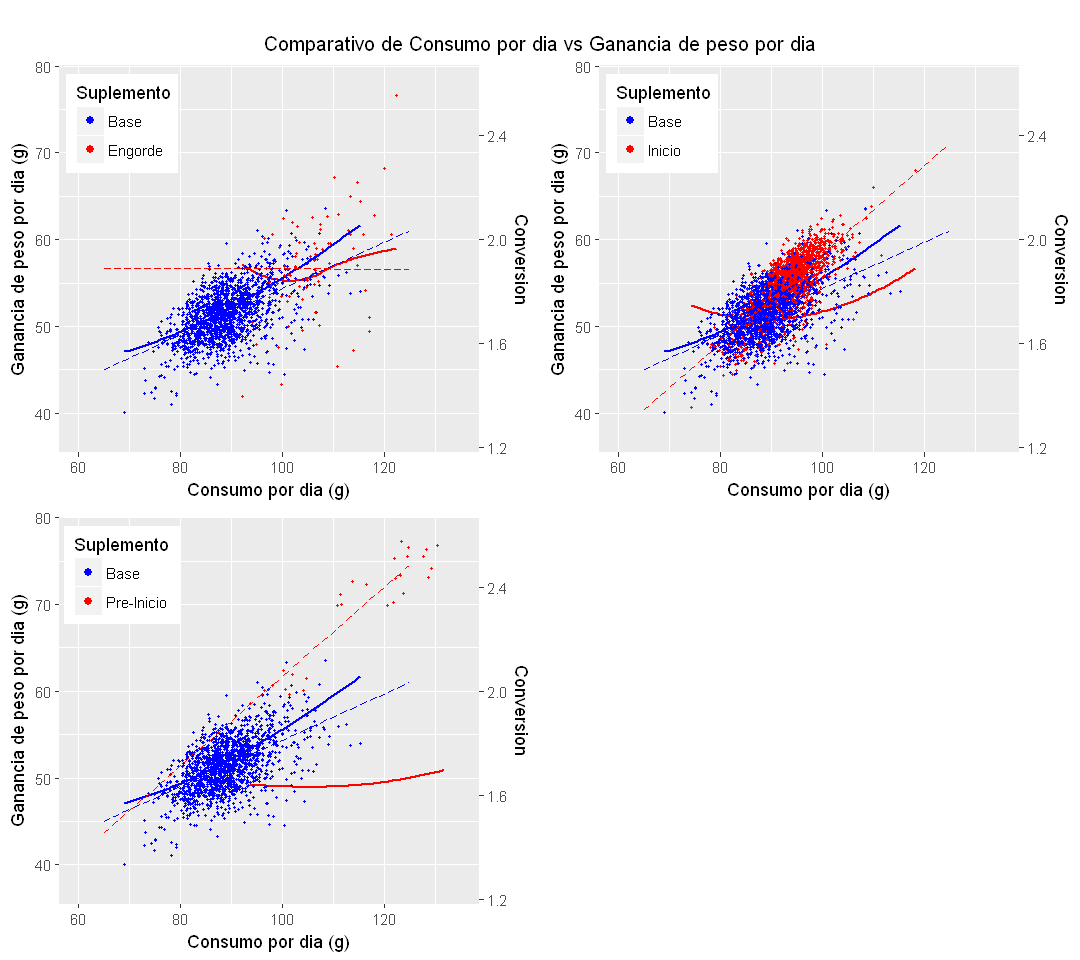

In [286]:
options(repr.plot.width=9,repr.plot.height=8) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, ncol = 2, top=textGrob("\n Comparativo de Consumo por dia vs Ganancia de peso por dia "))

In [183]:
str(suplemento$conversion *25)

 num [1:1725] 45 43.3 44.2 42.9 42.4 ...


In [ ]:
#Distribucion original del peso. Ligeramente inclinada hacia la izquierda
v1 <- ad3[ad3$pesoFinalPolloG>0 & !is.na(ad3$pesoFinalPolloG),"pesoFinalPolloG"]
p1 <-ggplot(data.frame(x=v1), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = 75) + 
    labs(x = "Peso Final", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v1, na.rm = TRUE), sd = sd(v1, na.rm = TRUE)), size = 0.4)

#QQ plot de la distribucion original
p2 <-qplot(sample = v1)

#Distribucion corregida por logaritmo
v2 <- log(v1)
p3 <-ggplot(data.frame(x=v2), aes(x)) + 
    theme(legend.position = "none") + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "white", binwidth = .02) + 
    labs(x = "Peso Final", y = "Density") + 
    stat_function(fun = dnorm, args = list(mean = mean(v2, na.rm = TRUE), sd = sd(v2, na.rm = TRUE)), size = 0.4)

# QQplot de la distribucion corregida
p4 <-qplot(sample = v2)

options(repr.plot.width=9, repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 4, top=textGrob("\n Visual normality inspection"))